In [14]:
import pandas as pd
import numpy as np
import re
import os
import sys

sys.path.append(os.path.relpath("../src/"))
from dataloader import S1, S2, S3, S4

In [86]:
s3 = S3()

arousal = np.zeros(8)
valence = np.zeros(8)
fold_0_missing_vid = [16, 20]
sub_rating_arousal = []
sub_rating_valence = []
sub_rating_arousal_std = []
sub_rating_valence_std = []

for i, vid in enumerate(s3.train_vids[0]):
    for j, sub in enumerate(s3.train_subs[0]):
        _, y = s3.train_data(0, sub, vid)
        arousal[i] = np.mean([arousal[i], np.mean(y['arousal'])])
        valence[i] = np.mean([valence[i], np.mean(y['valence'])])
        if len(sub_rating_arousal) <= j:
            sub_rating_arousal.append([y['arousal'].values])
            sub_rating_valence.append([y['valence'].values])
        else:
            sub_rating_arousal[j].append(y['arousal'].values)
            sub_rating_valence[j].append(y['valence'].values)
for i, vid in enumerate(fold_0_missing_vid):
    for sub in s3.train_subs[0]:
        _, y = s3.train_data(1, sub, vid)
        arousal[i+6] = np.mean([arousal[i], np.mean(y['arousal'])])
        valence[i+6] = np.mean([valence[i], np.mean(y['valence'])])
        sub_rating_arousal[j].append(y['arousal'].values)
        sub_rating_valence[j].append(y['valence'].values)

In [87]:
for i in range(len(s3.train_subs[0])):
    sub_rating_arousal[i] = np.concatenate(sub_rating_arousal[i])
    sub_rating_valence[i] = np.concatenate(sub_rating_valence[i])

In [88]:
for i in range(len(s3.train_subs[0])):
    sub_rating_arousal_std.append(np.std(sub_rating_arousal[i]))
    sub_rating_valence_std.append(np.std(sub_rating_valence[i]))

In [95]:
lazy_subject = np.concatenate(np.argwhere(np.array(sub_rating_arousal_std + sub_rating_valence_std) < 0.4))

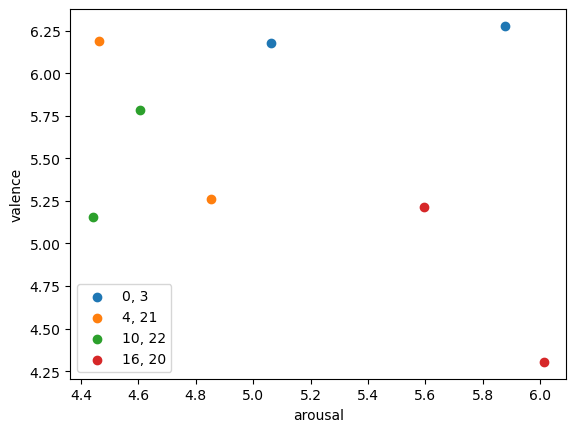

In [58]:
from matplotlib import pyplot as plt
plt.xlabel('arousal')
plt.ylabel('valence')
plt.scatter(arousal[[0,1]], valence[[0,1]], label='0, 3')
plt.scatter(arousal[[2,4]], valence[[2,4]], label='4, 21')
plt.scatter(arousal[[3,5]], valence[[3,5]], label='10, 22')
plt.scatter(arousal[[6,7]], valence[[6,7]], label='16, 20')
# plt.plot(valence, 'o-', label='valence')
plt.legend()

In [96]:
arousal = np.zeros(8)
valence = np.zeros(8)
fold_0_missing_vid = [16, 20]

for i, vid in enumerate(s3.train_vids[0]):
    for j, sub in enumerate(s3.train_subs[0]):
        if sub not in lazy_subject:
            _, y = s3.train_data(0, sub, vid)
            arousal[i] = np.mean([arousal[i], np.mean(y['arousal'])])
            valence[i] = np.mean([valence[i], np.mean(y['valence'])])
for i, vid in enumerate(fold_0_missing_vid):
    for sub in s3.train_subs[0]:
        if sub not in lazy_subject:
            _, y = s3.train_data(1, sub, vid)
            arousal[i+6] = np.mean([arousal[i], np.mean(y['arousal'])])
            valence[i+6] = np.mean([valence[i], np.mean(y['valence'])])

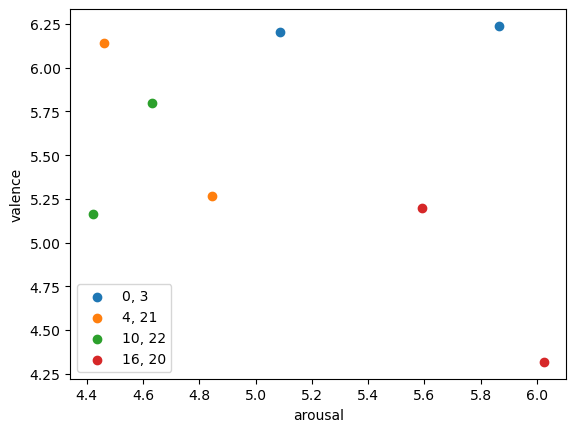

In [97]:
plt.xlabel('arousal')
plt.ylabel('valence')
plt.scatter(arousal[[0,1]], valence[[0,1]], label='0, 3')
plt.scatter(arousal[[2,4]], valence[[2,4]], label='4, 21')
plt.scatter(arousal[[3,5]], valence[[3,5]], label='10, 22')
plt.scatter(arousal[[6,7]], valence[[6,7]], label='16, 20')
plt.legend()